In [1]:
import pandas as pd
df = pd.read_csv('data/compas-scores-raw.csv')

In [2]:
df.head()

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Person_ID,60843.0,53683.206154,14363.648515,656.00,52039.00,57321.00,62748.0,68608.0
AssessmentID,60843.0,68061.029190,7320.208226,649.00,62582.00,68229.00,73870.0,79678.0
Case_ID,60843.0,60209.128149,9638.501654,350.00,56021.00,61261.00,66554.0,72045.0
ScaleSet_ID,60843.0,21.819536,0.932614,17.00,22.00,22.00,22.0,22.0
RecSupervisionLevel,60843.0,1.630048,0.944220,1.00,1.00,1.00,2.0,4.0
Scale_ID,60843.0,11.000000,4.966596,7.00,7.00,8.00,18.0,18.0
RawScore,60843.0,5.081457,10.080518,-4.79,-2.09,-0.71,14.0,51.0
DecileScore,60843.0,3.571701,2.617854,-1.00,1.00,3.00,5.0,10.0
IsCompleted,60843.0,1.000000,0.000000,1.00,1.00,1.00,1.0,1.0
IsDeleted,60843.0,0.000000,0.000000,0.00,0.00,0.00,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60843 entries, 0 to 60842
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person_ID                60843 non-null  int64  
 1   AssessmentID             60843 non-null  int64  
 2   Case_ID                  60843 non-null  int64  
 3   Agency_Text              60843 non-null  object 
 4   LastName                 60843 non-null  object 
 5   FirstName                60843 non-null  object 
 6   MiddleName               15648 non-null  object 
 7   Sex_Code_Text            60843 non-null  object 
 8   Ethnic_Code_Text         60843 non-null  object 
 9   DateOfBirth              60843 non-null  object 
 10  ScaleSet_ID              60843 non-null  int64  
 11  ScaleSet                 60843 non-null  object 
 12  AssessmentReason         60843 non-null  object 
 13  Language                 60843 non-null  object 
 14  LegalStatus           

# Making sense of the variables #

**Person_ID** - Identification associated with defendants <br>
**AssessmentID** - Identification associated with assessment <br>
**Case_ID** - Identification associated with case <br>
**Agency_Text** - Where the people were assessed by COMPAS <br>
**LastName, FirstName, MiddleName** - Name information of defendants <br>
**Sex_Code_Text** - Defendant gender information (Male/Female) <br>
**Ethnic_Code_Text** - Defendant racial information (9 ethnicities) <br>
**DateOfBirth** - Defendant age information (Can be utilized with Screening_Date to obtain age) <br>
**ScaleSet_ID** - Based on ScaleSet (17 = All Scales, 22 = Risk and Prescreen) <br>
**ScaleSet** - Scale applied for assessment (All Scales/Risk and Prescreen)<br>
**AssessmentReason** - All values are "intake"<br>
**Language** - Assumed to be language utilized by defendant (English/Spanish) <br>
**LegalStatus** - Defendant's legal status (Parole violator, Pretrial, etc)<br>
**CustodyStatus** - Defendant's custodial status (Parole, Probation, etc)<br>
**MaritalStatus** - Defendant's marital status (Married/Single)<br>
**Screening_Date** - Date where defendant was assessed and score given<br>
**RecSupervisionLevel** - Recomended Supervision Level scored from 1 to 4<br>
**RecSupervisionLevelText** - 1 = Low, 2 = Medium, 3 = Medium with Override Consideration, 4 = High<br>
**Scale_ID** - Identification associated with scale used (7/8/18)<br>
**DisplayText** - Risk of Violence/Risk of Recidivism/Risk of failure to appear <br>Every Person_ID is repeated thrice to account for these 3<br>
**RawScore** - Risk score associated with display text<br>
**DecileScore** - Score associated with defendant (in a scale of 1 to 10 and "NA")<br>
**ScoreText** - Category based on DecileScore<br>
Below 5 is "Low", 5-7 is "Medium", 8-10 is "High", -1 is given "NA" (empty)<br>
**AssessmentType** - New or Copy, whether previously generated or new<br> 
**IsCompleted** -All default to 1<br>
**IsDeleted** - All default to 0<br>

In [5]:
n = df.nunique(axis=0)
print("No.of.unique values in each column :\n",
      n)

No.of.unique values in each column :
 Person_ID                  18610
AssessmentID               20281
Case_ID                    19530
Agency_Text                    4
LastName                   10896
FirstName                   7225
MiddleName                  1871
Sex_Code_Text                  2
Ethnic_Code_Text               9
DateOfBirth                10382
ScaleSet_ID                    2
ScaleSet                       2
AssessmentReason               1
Language                       2
LegalStatus                    7
CustodyStatus                  6
MaritalStatus                  7
Screening_Date               705
RecSupervisionLevel            4
RecSupervisionLevelText        4
Scale_ID                       3
DisplayText                    3
RawScore                     659
DecileScore                   11
ScoreText                      3
AssessmentType                 2
IsCompleted                    1
IsDeleted                      1
dtype: int64


In [6]:
print("For Agency_Text variable")
print(df["Agency_Text"].unique())
print(df["Agency_Text"].value_counts())

print("\nFor ScaleSet variable")
print(df["ScaleSet"].unique())
print(df["ScaleSet"].value_counts())

print("\nFor ScaleSet_ID variable")
print(df["ScaleSet_ID"].unique())
print(df["ScaleSet_ID"].value_counts())

print("\nFor LegalStatus variable")
print(df["LegalStatus"].unique())
print(df["LegalStatus"].value_counts())

print("\nFor CustodyStatus variable")
print(df["CustodyStatus"].unique())
print(df["CustodyStatus"].value_counts())

print("\nFor RecSupervisionLevel variable")
print(df["RecSupervisionLevel"].unique())
print(df["RecSupervisionLevel"].value_counts())

print("\nFor RecSupervisionLevelText variable")
print(df["RecSupervisionLevelText"].unique())
print(df["RecSupervisionLevelText"].value_counts())

print("\nFor Scale_ID variable")
print(df["Scale_ID"].unique())
print(df["Scale_ID"].value_counts())

print("\nFor DecileScore variable")
print(df["DecileScore"].unique())
print(df["DecileScore"].value_counts())

print("\nFor ScoreText variable")
print(df["ScoreText"].unique())
print(df["ScoreText"].value_counts())

For Agency_Text variable
['PRETRIAL' 'Probation' 'DRRD' 'Broward County']
PRETRIAL          41100
Probation         19056
DRRD                564
Broward County      123
Name: Agency_Text, dtype: int64

For ScaleSet variable
['Risk and Prescreen' 'All Scales']
Risk and Prescreen    58647
All Scales             2196
Name: ScaleSet, dtype: int64

For ScaleSet_ID variable
[22 17]
22    58647
17     2196
Name: ScaleSet_ID, dtype: int64

For LegalStatus variable
['Pretrial' 'Post Sentence' 'Conditional Release' 'Other'
 'Probation Violator' 'Parole Violator' 'Deferred Sentencing']
Pretrial               37578
Post Sentence          18333
Other                   4356
Conditional Release      420
Probation Violator       126
Parole Violator           18
Deferred Sentencing       12
Name: LegalStatus, dtype: int64

For CustodyStatus variable
['Jail Inmate' 'Probation' 'Pretrial Defendant' 'Residential Program'
 'Prison Inmate' 'Parole']
Jail Inmate            30129
Probation              22968

# Breaking down the racial biased dataset #
We shall dive into the ethnicity variable to understand more about the distribution as well as shape of the variable itself <br>
We shall also investigate the ending "DocileScore" and "Raw Score" with relation to "Ethnic_Code_Text"

In [7]:
print("For Ethnic_Code_Text variable")
print(df["Ethnic_Code_Text"].unique())
print(df["Ethnic_Code_Text"].value_counts())

For Ethnic_Code_Text variable
['Caucasian' 'African-American' 'Hispanic' 'Other' 'Asian' 'African-Am'
 'Native American' 'Oriental' 'Arabic']
African-American    27018
Caucasian           21783
Hispanic             8742
Other                2592
Asian                 324
Native American       219
Arabic                 75
African-Am             51
Oriental               39
Name: Ethnic_Code_Text, dtype: int64


In [8]:
# Changing of "African-Am" to "African-American"
df["Ethnic_Code_Text"].replace({"African-Am": "African-American"}, inplace=True)
print("For Ethnic_Code_Text variable")
print(df["Ethnic_Code_Text"].unique())
print(df["Ethnic_Code_Text"].value_counts())

For Ethnic_Code_Text variable
['Caucasian' 'African-American' 'Hispanic' 'Other' 'Asian'
 'Native American' 'Oriental' 'Arabic']
African-American    27069
Caucasian           21783
Hispanic             8742
Other                2592
Asian                 324
Native American       219
Arabic                 75
Oriental               39
Name: Ethnic_Code_Text, dtype: int64


### There is no changes done to Oriental or Asian
Oriental means Eastern. Asian is from Asia. The term Oriental is English in origin because relative to Great Britain, Asia is to the east. <br>
From google: "In contemporary American English, Oriental usually refers to things from the parts of East Asia traditionally occupied by East Asians and most Central Asians and Southeast Asians racially categorized as "Mongoloid". This excludes Jews, Indians, Arabs, and most other South or West Asian peoples."

<AxesSubplot:xlabel='Ethnic_Code_Text'>

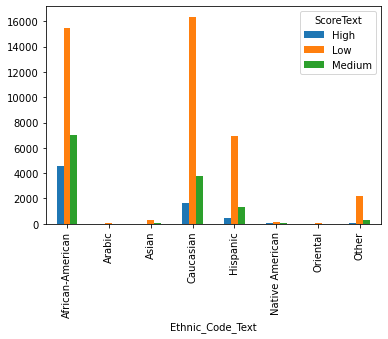

In [9]:
text_by_race = df.groupby(["Ethnic_Code_Text", "ScoreText"], sort=True)["Person_ID"].size()
text_by_race.unstack().plot.bar(stacked=False)

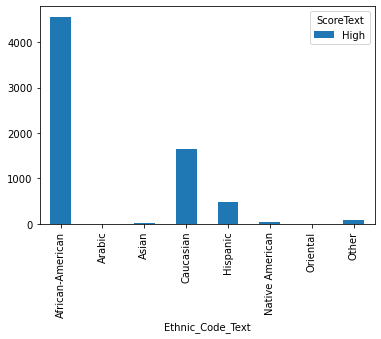

In [10]:
#To explore where "ScoreText" = "High"
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df_high_score = df[df["ScoreText"] == "High"]

# Group by "Ethnic_Code_Text" and "ScoreText" and get the count
text_by_race = df_high_score.groupby(["Ethnic_Code_Text", "ScoreText"], sort=True)["Person_ID"].size()

# Unstack and plot
text_by_race.unstack().plot.bar(stacked=False)
plt.show()

<AxesSubplot:title={'center':'Mean DecileScore By Race'}, xlabel='Ethnic_Code_Text'>

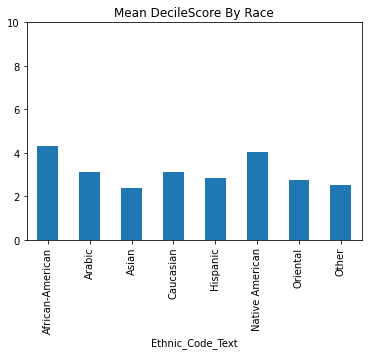

In [11]:
decile_by_race = df.groupby(["Ethnic_Code_Text"], sort=True)["DecileScore"].mean()
decile_by_race.plot(kind='bar', title='Mean DecileScore By Race', ylim=(0,10))

<AxesSubplot:title={'center':'Mean RawScore By Race'}, xlabel='Ethnic_Code_Text'>

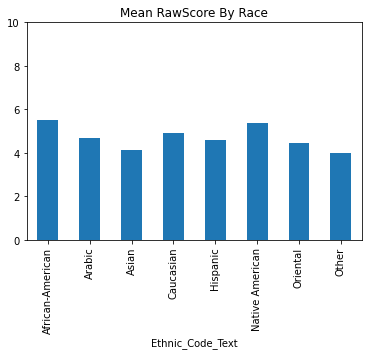

In [12]:
rscore_by_race = df.groupby(["Ethnic_Code_Text"], sort=True)["RawScore"].mean()
rscore_by_race.plot(kind='bar', title='Mean RawScore By Race', ylim=(0,10))

### Some observations
1. RawScore has a high correlation with DecileScore
2. There is 

# Find rows where predictors are very similar but response different
To do this, we would first have to consider removing identification variables and bin numerical variables to lower the range <br>
This includes the following
1. Person_ID
2. AssessmentID
3. Case_ID
4. LastName
5. FirstName
6. MiddleName
7. ScaleSet_ID
8. AssessmentReason
9. Screening_Date
10. RecSupervisionLevelText
11. Scale_ID
12. AssessmentType
13. IsCompleted
14. IsDeleted

Following can be transformed
1. DOB transformed to show exact age --> datediff(DOB - Screening_Date)

In [13]:
from datetime import datetime
# Convert string dates to datetime objects
df['Screening_Date'] = pd.to_datetime(df['Screening_Date'])
df['DateOfBirth'] = pd.to_datetime(df['DateOfBirth'])

# Calculate age and create a new column "Age"
df['Age'] = (df['Screening_Date'] - df['DateOfBirth']).astype('<m8[Y]')
df

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted,Age
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,1992-12-05,...,Low,7,Risk of Violence,-2.08,4,Low,New,1,0,20.0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,1992-12-05,...,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0,20.0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,1992-12-05,...,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0,20.0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,1984-09-16,...,Low,7,Risk of Violence,-2.84,2,Low,New,1,0,28.0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,1984-09-16,...,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60838,65667,79665,72038,Probation,West,James,NaN,Male,African-American,2064-06-21,...,Medium with Override Consideration,8,Risk of Recidivism,0.16,8,High,New,1,0,-50.0
60839,65667,79665,72038,Probation,West,James,NaN,Male,African-American,2064-06-21,...,Medium with Override Consideration,18,Risk of Failure to Appear,35.00,10,High,New,1,0,-50.0
60840,68603,79669,72042,PRETRIAL,Ryan,Michael,NaN,Male,Caucasian,1985-02-06,...,Low,7,Risk of Violence,-2.75,2,Low,New,1,0,29.0
60841,68603,79669,72042,PRETRIAL,Ryan,Michael,NaN,Male,Caucasian,1985-02-06,...,Low,8,Risk of Recidivism,-0.34,5,Medium,New,1,0,29.0


In [14]:
earliest_sdate = df['Screening_Date'].min()
print("Earliest Screening Date:", earliest_sdate)
latest_date = df['DateOfBirth'].max()
print("Latest DoB:", latest_date)

Earliest Screening Date: 2013-01-01 00:00:00
Latest DoB: 2073-12-31 00:00:00


In [15]:
df['Screening_Date']

0       2013-01-01
1       2013-01-01
2       2013-01-01
3       2013-01-01
4       2013-01-01
           ...    
60838   2014-12-31
60839   2014-12-31
60840   2014-12-31
60841   2014-12-31
60842   2014-12-31
Name: Screening_Date, Length: 60843, dtype: datetime64[ns]

In [16]:
df.head()

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted,Age
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,1992-12-05,...,Low,7,Risk of Violence,-2.08,4,Low,New,1,0,20.0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,1992-12-05,...,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0,20.0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,1992-12-05,...,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0,20.0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,1984-09-16,...,Low,7,Risk of Violence,-2.84,2,Low,New,1,0,28.0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,1984-09-16,...,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0,28.0


In [17]:
# Consider plotting correlation graph to see which one plays highest impact
# Plot raw score, docile score, score text